# Weight Prediction
#### CHAPTER 01: _Interpretation, Interpretability, and Explainability; and why does it all matter?_
##### From **Interpretable Machine Learning with Python 2nd Edition** by Serg Masís, published by Packt

## The Preparations

### Installing the Libraries

The following cell checks if the libraries required by this chapter are installed and installs them **ONLY** if they aren't. Please note that this step is not necessary if you have already installed ALL libraries required by the entire book with the [setup.py](../setup.py) script for the entire book. Instructions to do this are in the [README.md](../README.md).

In [ ]:
!python chapter_setup.py

### Loading the Libraries

In [1]:
import math
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

## Understanding a Simple Weight Prediction Model

### Loading and Preparing the Data

**Load Webpage & Extract Content into DataFrame**

In [2]:
#UPDATE - Needed new URL for data
#url = 'http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights'

url = 'http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html'
df = pd.read_html(url)[0]



In [3]:
#UPDATE - Needed extra data wrangling to get correct columns and rows. 
height_weight_df = df.iloc[1:, [1, 2]].head(200).reset_index(drop=True)
height_weight_df.columns = ['Height(Inches)', 'Weight(Pounds)']

print(height_weight_df.columns)
print(height_weight_df.head())


Index(['Height(Inches)', 'Weight(Pounds)'], dtype='object')
  Height(Inches) Weight(Pounds)
0       65.78331       112.9925
1       71.51521       136.4873
2       69.39874       153.0269
3        68.2166       142.3354
4       67.78781       144.2971


**Count Records**

In [4]:
num_records = len(height_weight_df)
print(num_records)

200


**Place in x and y variables**

In [5]:
x = height_weight_df['Height(Inches)'].values.reshape(num_records, 1)
y = height_weight_df['Weight(Pounds)'].values.reshape(num_records, 1)
  

#UPDATE - convert from string to float 
x = x.astype(float)
y = y.astype(float) 


### Fitting a Linear Regression Model

**Fit Model**

In [6]:
model = linear_model.LinearRegression().fit(x,y)

**Generate Equation**

In [7]:
print("ŷ = " + str(model.intercept_[0]) + " + " + str(model.coef_.T[0][0]) + " x₁")

ŷ = -105.95901104668286 + 3.431665151629645 x₁


In [8]:
print(type(x))
print(np.shape(x))
print(type(y))
print(np.shape(y))


<class 'numpy.ndarray'>
(200, 1)
<class 'numpy.ndarray'>
(200, 1)


**Compute Mean Absolute Error**

In [9]:
y_pred = model.predict(x)
mae = mean_absolute_error(y, y_pred)
print(mae)

print(type(y_pred))
print(np.shape(y_pred))

7.759091673084347
<class 'numpy.ndarray'>
(200, 1)


**Plot Regression Line ± Error**

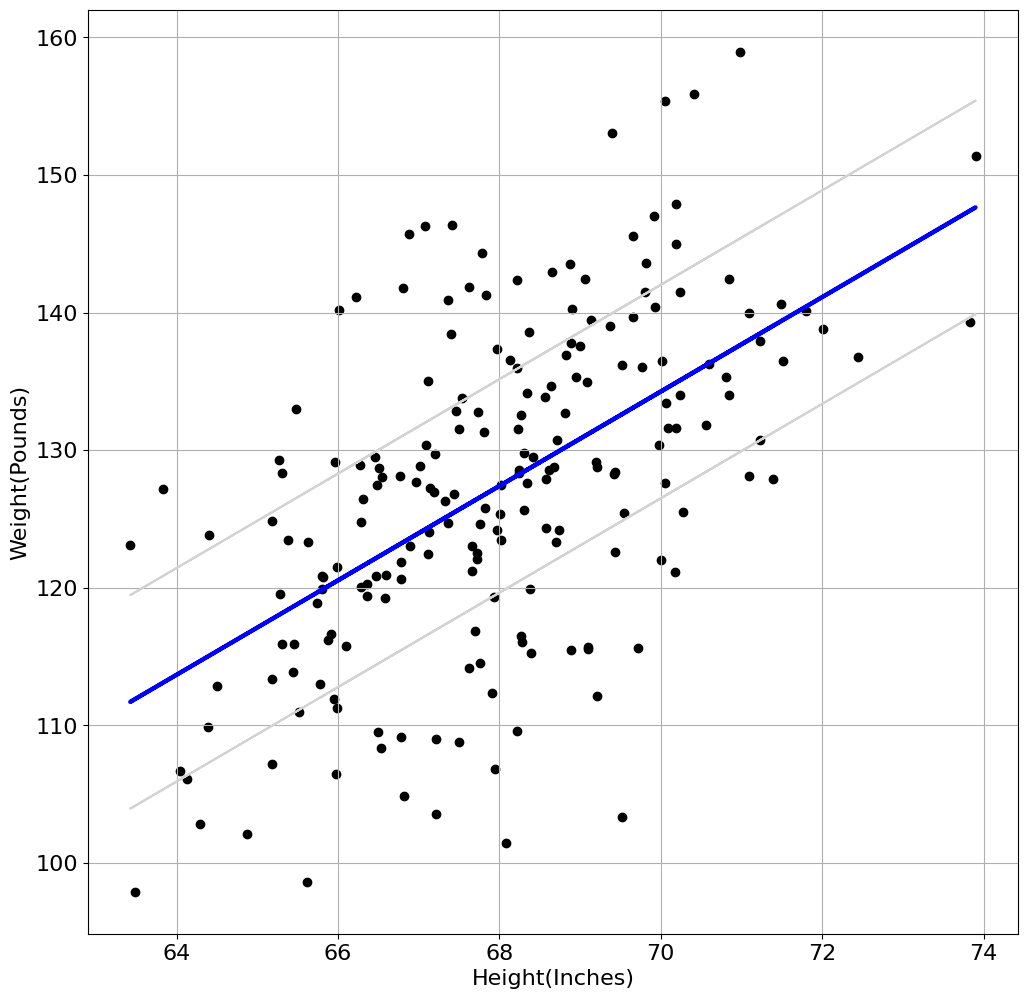

In [11]:
plt.figure(figsize=(12,12))
plt.rcParams.update({'font.size': 16})
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.plot(x, y_pred + mae, color='lightgray')
plt.plot(x, y_pred - mae, color='lightgray')
plt.title('')
plt.xlabel('Height(Inches)')
plt.ylabel('Weight(Pounds)')
plt.grid(True)
plt.show()

**Calculate Pearsons Correlation Coefficient**

In [12]:
corr, pval = pearsonr(x[:,0], y[:,0])
print(corr)

0.5567724259793426


**Two-tailed p-value**

In [13]:
print(pval < 0.05)

True


## Learnings

### Difficulties
* Trouble pulling the data from the given URL.  Had to switch to a different URL
    * Had to update data cleaning steps due to new URL
* Wasn't able to plot. TypeError: unhashable type: 'numpy.ndarray'  
    * Had to convert x, y from strings to float
* Copilot couldn't find the string to int issue.
    * It doubled down on 'should convert x to a list before using it in the plotting functions.'
    * Finally figured out the issue by skipping to the last cell where there was a string vs numeric error.  





